# Implementation of Neural Network Classification on NSL-KDD Dataset
Using Method Described in *"Traffic Analysis Based Identification of Attacks"* found [here](http://cecs.louisville.edu/ry/Traffic.pdf).

Uses scikit-learn MLP learner to classify [NSL-KDD dataset](http://www.unb.ca/cic/research/datasets/nsl.html) and analyze results.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.neural_network import MLPClassifier

## Data Preprocessing
Define a data loading function, categorical variables are converted into numerical using categorical codes.

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

def load_data(file_path, cols=None):
    
    data = pd.read_csv(file_path)
    
 
    
    #Issues with values on columns 14 and 15
    #data.replace("NaN" ,0,inplace=True)
    #data.replace("Infinity", 0, inplace=True)
    
    data.dropna(inplace=True)
    
    """
    for col in data.columns:
        if (sum(data[col] =='NaN') > 0):
            print("Error : still NaN values in data \n")
        
        if(sum(data[col] =='Infinity') >0):
            print("Error : still Infinity values in data \n")
        
    """ 
  
    for col in data.columns: 
        if(col == ' Label') : print("Ignore column Label")
        
        else : data = data.loc[(data[col] < np.finfo(np.float64).max )] 
        
    # Shuffle data

    data = data.sample(frac=1).reset_index(drop=True)
      
    labels = data[' Label']        #VILAIN IDS2017 POUR L'ESPACE DEVANT DANS ' LABEL'. Bien profond hein.
    data.drop(' Label', axis=1, inplace=True)
    
    #data.iloc[:] = minmax_scale(data.iloc[:])
    
        
    return [data, labels]

## Slicing IDS 2017 to Training Set and Test Set

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

def load_slice_data(file_path, cols=None):
    
    data = pd.read_csv(file_path)
    
 
    
    #Issues with values on columns 14 and 15
    #data.replace("NaN" ,0,inplace=True)
    #data.replace("Infinity", 0, inplace=True)
    
    data.dropna(inplace=True)
    
    """
    for col in data.columns:
        if (sum(data[col] =='NaN') > 0):
            print("Error : still NaN values in data \n")
        
        if(sum(data[col] =='Infinity') >0):
            print("Error : still Infinity values in data \n")
        
    """ 
    
  
    data = data.sample(frac=1).reset_index(drop=True)

    
      
    #labels = data[' Label']       
    #data.drop(' Label', axis=1, inplace=True)
    
    #data.iloc[:] = minmax_scale(data.iloc[:])
    
        
    return data

In [5]:
train_data = load_slice_data('concat.csv')


In [6]:
print(train_data.shape)

(2829385, 79)


In [7]:

chunk = int (train_data.shape[0]*75/100)  #ratio = 75 %  /  25% 
train_set =train_data.iloc[:chunk,:]
test_set = train_data.iloc[chunk:,:]

print(train_set.shape)
print(test_set.shape)


test_set.head()

(2122038, 79)
(707347, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2122038,80,98305944,7,6,361,11595,355,0,51.571429,133.818107,...,20,992.0,0.0,992,992,98200000.0,0.0,98200000,98200000,DoS Hulk
2122039,53,30464,1,1,56,94,56,56,56.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2122040,53,215,2,2,92,248,46,46,46.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2122041,53,30276,1,1,47,63,47,47,47.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2122042,80,26115,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


## Exporting dataframes to csv files

In [8]:
train_set.to_csv("train_IDS2017.csv", index=False)
test_set.to_csv("test_IDS2017.csv", index=False)

## Reducing the number of benign frames

In [18]:
def load_reduce_data(file_path, ratio = 4, cols=None):
    
    data = pd.read_csv(file_path)
 
    
    #Issues with values on columns 14 and 15
    #data.replace("NaN" ,0,inplace=True)
    #data.replace("Infinity", 0, inplace=True)
    
    
    """
    for col in data.columns:
        if (sum(data[col] =='NaN') > 0):
            print("Error : still NaN values in data \n")
        
        if(sum(data[col] =='Infinity') >0):
            print("Error : still Infinity values in data \n")
        
    """ 
    
    #Reduce the number of benign frames to increase recall
    
    L = []
    count = 0
    for i, row in data.iterrows():
      
        if (count != ratio) & (row[' Label']  == "BENIGN"):
             L.append(i)
            
        elif count == ratio :                
            count = 0
        
        count += 1 

            
    data.drop(L,inplace=True)
    
    data = data.sample(frac=1).reset_index(drop=True)

    
      
    #labels = data[' Label']        
    #data.drop(' Label', axis=1, inplace=True)
    
    #data.iloc[:] = minmax_scale(data.iloc[:])
    
        
    return data

In [19]:
train_data = load_reduce_data('train_IDS2017.csv')
train_data.to_csv("train_reduced_IDS2017.csv", index=False)

In [20]:
test_data = load_reduce_data('test_IDS2017.csv')
test_data.to_csv("test_reduced_IDS2017.csv", index=False)

## Neural Network Training and Testing
Define a function that trains the model and evaluates it on the test data, outputs accuracy on the training and test sets.

In [21]:
def train_clf(train_data, train_labels):
    bin_labels = train_labels.apply(lambda x: x if x =='BENIGN' else 'ANOMALY')
    clf = MLPClassifier(hidden_layer_sizes=(78,3), alpha=.7,
                        beta_1=.8, beta_2=.8)
    clf.fit(train_data, bin_labels)
    
    train_preds = clf.predict(train_data)
    
    TP = sum((train_preds == bin_labels) & (bin_labels == 'ANOMALY'))
    FP = sum((train_preds != bin_labels) & (bin_labels == 'BENIGN'))
    
    TN = sum((train_preds == bin_labels) & (bin_labels == 'BENIGN'))
    FN = sum((train_preds != bin_labels) & (bin_labels == 'ANOMALY'))
    
    train_acc = sum(train_preds == bin_labels)/len(train_preds)
    
    train_precision = TP/ (TP + FP) #Note: TP + FP = sum(train_preds == bin_labels)
    
    train_recall = TP/(TP + FN) #Note : TN + FN = sum(train_preds != bin_labels)
    
    train_f = 2 * train_precision * train_recall /(train_precision + train_recall)
    
    print("Accuracy on training set: {0:1%}".format(train_acc))
    print("Precision on training set: {0:1%}".format(train_precision))
    print("Recall on training set: {0:1%}".format(train_recall))
    print("F measure on training set: {0:1%}".format(train_f))

    return clf

In [22]:
def test_clf(test_data, test_labels, clf):
    bin_labels = test_labels.apply(lambda x: x if x =='BENIGN' else 'ANOMALY')
    test_preds = clf.predict(test_data)
    
    TP = sum((test_preds == bin_labels) & (bin_labels == 'ANOMALY'))
    FP = sum((test_preds != bin_labels) & (bin_labels == 'BENIGN'))
    
    TN = sum((test_preds == bin_labels) & (bin_labels == 'BENIGN'))
    FN = sum((test_preds != bin_labels) & (bin_labels == 'ANOMALY'))
    
    test_acc = sum(test_preds == bin_labels)/len(test_preds)
    
    test_precision = TP/ (TP + FP) #Note: TP + FP = sum(train_preds == bin_labels)
    
    test_recall = TP/(TP + FN) #Note : TN + FN = sum(train_preds != bin_labels)
    
    test_f = 2 * test_precision * test_recall /(test_precision + test_recall)
    print("Accuracy on test set: {0:1%}".format(test_acc))
    print("Precision on test set: {0:1%}".format(test_precision))
    print("Recall on test set: {0:1%}".format(test_recall))
    print("F measure on test set: {0:1%}".format(test_f))
    return test_preds

# Training Classifier

In [23]:
train_data, train_labels = load_data('train_reduced_IDS2017.csv')
train_data.head()

Ignore column Label


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53,144,2,2,48,80,24,24,24.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,443,3,2,0,12,0,6,6,6.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,53,215,2,2,72,136,36,36,36.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,8002,45,1,1,0,6,0,0,0.0,0.00000,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
4,55984,3,2,0,31,0,31,0,15.5,21.92031,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [24]:
print(train_data.shape)

(843869, 78)


In [25]:
clf = train_clf((train_data), train_labels)


Accuracy on training set: 81.990570%
Precision on training set: 74.182142%
Recall on training set: 97.597299%
F measure on training set: 84.293867%


# Testing

In [26]:
test_data, test_labels = load_data('test_reduced_IDS2017.csv')
test_data.head()

Ignore column Label


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,213024,4,0,24,0,6,6,6.0,0.000000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
1,4998,73,1,1,0,6,0,0,0.0,0.000000,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
2,53,8721338,4,4,168,476,51,33,42.0,10.392305,...,3,20,197.0,0.0,197,197,8672545.0,0.0,8672545,8672545
3,80,99999606,2,2,16,0,8,8,8.0,0.000000,...,1,32,80.0,0.0,80,80,100000000.0,0.0,100000000,100000000
4,53,151,2,2,80,200,40,40,40.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [27]:
print(test_data.shape)

(280795, 78)


In [28]:
test_preds = test_clf(test_data, test_labels, clf)

Accuracy on test set: 82.131448%
Precision on test set: 74.276656%
Recall on test set: 97.637228%
F measure on test set: 84.369763%


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

bin_labels = test_labels.apply(lambda x: x if x =='BENIGN' else 'ANOMALY')

metric = cross_validate(train_clf(test_data, test_labels), test_data, bin_labels, cv=2, scoring=['accuracy','precision','recall','f1'],
                        return_train_score=True)
print("Accuracy: %0.5f (+/- %0.5f)" % (metric['test_accuracy'].mean(), metric['test_accuracy'].std() * 2))
print("Precision: %0.5f (+/- %0.5f)" % (metric['test_precision'].mean(), metric['test_precision'].std() * 2))
print("Recall: %0.5f (+/- %0.5f)" % (metric['test_recall'].mean(), metric['test_recall'].std() * 2))
print("F-measure: %0.5f (+/- %0.5f)" % (metric['test_f1'].mean(), metric['test_f1'].std() * 2))



Accuracy on training set: 71.860966%
Precision on training set: 64.064061%
Recall on training set: 98.004946%
F measure on training set: 77.480512%


/home/infres/tily/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/infres/tily/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/infres/tily/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/home/infres/tily/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/infres/tily/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/infres/tily/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1656, in

## Not used

In [29]:
ATTACKS = {
    'BENIGN': 'BENIGN',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

test_cat_labels = test_labels.apply(lambda x: ATTACKS[x])
cats = {'U2R':[0, 0], 'DoS':[0, 0], 'R2L':[0, 0], 'Probe':[0, 0], 'BENIGN':[0, 0]}
for cat, pred in zip(test_cat_labels, test_preds):
    cats[cat][pred=='BENIGN'] += 1
print(cats)

for key, values in cats.items():
    print('\n' + key)
    total = sum(values)
    print('Total rows: {}'.format(total))
    if key == 'BENIGN':
        correct = values[1]
    else:
        correct = values[0]
    print('Percent correctly classified: {:.1%}'.format(correct/total))

KeyError: 'PortScan'

NameError: name 'cats' is not defined

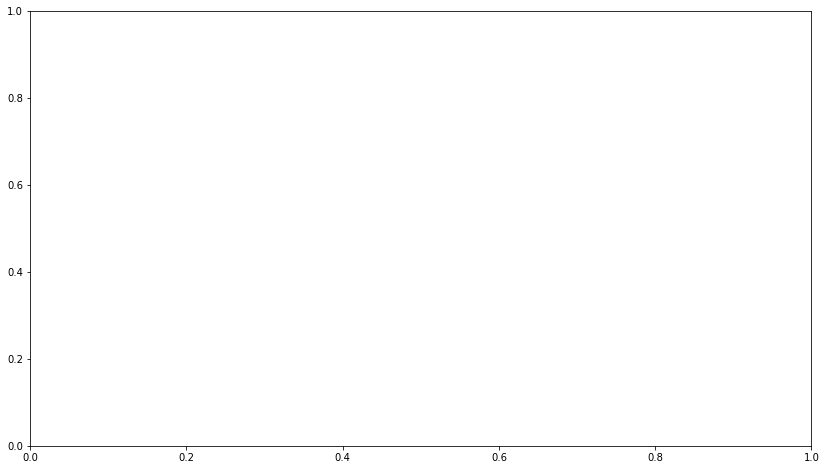

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind = np.arange(4)
width = .25
fig, ax = plt.subplots(figsize=(14,8))
del cats['normal']
anoms = [values[0] for key, values in cats.items()]
norms = [values[1] for key, values in cats.items()]
rect1 = ax.bar(ind, anoms, width, color='crimson')
rect2 = ax.bar(ind + width, norms, width, color='grey')
ax.set_ylabel('Number of Rows')
ax.set_title('Accuracy by Category')
ax.set_xlabel('Categories')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(cats.keys())
ax.legend((rect1[0], rect2[0]), ('Anomaly', 'Normal'))

def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rect1, ax)
autolabel(rect2, ax)

__Probe__ and __DoS__ have the highest accuracy, while __U2R__ is about even. __R2L__ classification is abysmal, however __normal__ labeling is almost _100%_, which means this classifier has a lot more false negatives than false positives.